In [13]:
%load_ext autoreload
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

import model as md
import view as vw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
duration = 100e-6
F_main_real=440e3
fs=F_main_real*40

t = np.linspace(0, duration, int(duration * fs))  
U = np.sin(2 * np.pi * F_main_real * t)

In [15]:
R= 50
C= 475e-12
t,I= md.RC_transfer(t,U,R,C)

In [16]:
F,V = md.get_spectrum3(t,U)

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

T_counts=md.convert_to_counts(t,T)

phase_real=md.get_phase_RC_real(F_peak_calc, R,C)
phase_real_graph= np.full(len(t), phase_real)

In [17]:
vw.show_I_U_3(t,I,U)

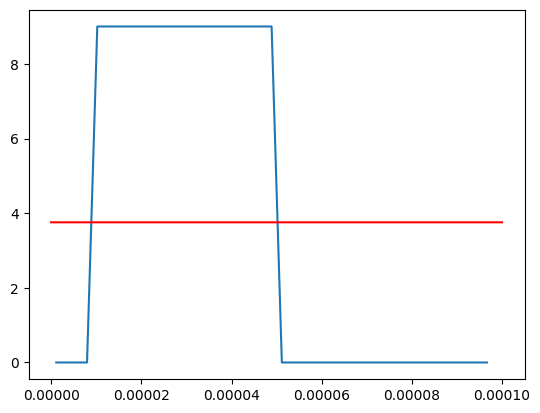

In [18]:
time_maxpoint,phase_maxpoint=md.get_phase_maxpoint_diff(t,U,I,F_peak_calc)

plt.plot(time_maxpoint,phase_maxpoint)
plt.plot(t,phase_real_graph,"red")

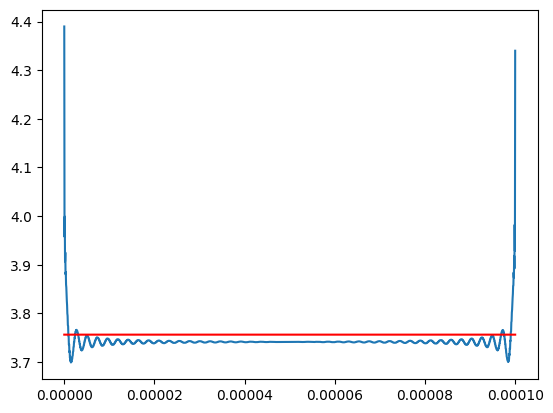

In [19]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t, U, I)

plt.plot(time_hilbert, phase_hilbert)
plt.plot(t,phase_real_graph,"red")

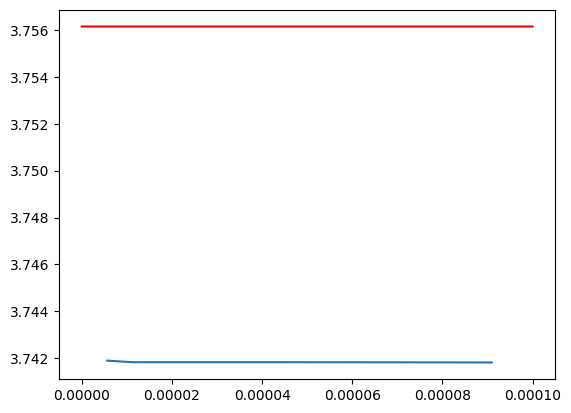

In [20]:
times, phase_diff = md.get_phase_FFT(t, U, I, F_main_real, n_periods=5, overlap=0.5)

plt.plot(times, phase_diff)
plt.plot(t,phase_real_graph,"red")

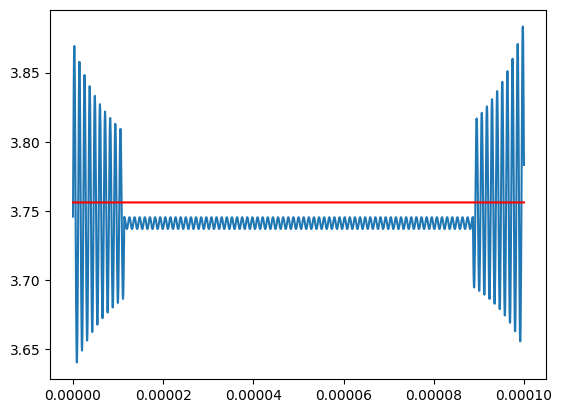

In [21]:
time_lockin, phase_lockin=md.get_phase_lockin(t, U, I,440e3)

plt.plot(time_lockin, phase_lockin)
plt.plot(t,phase_real_graph,"red")

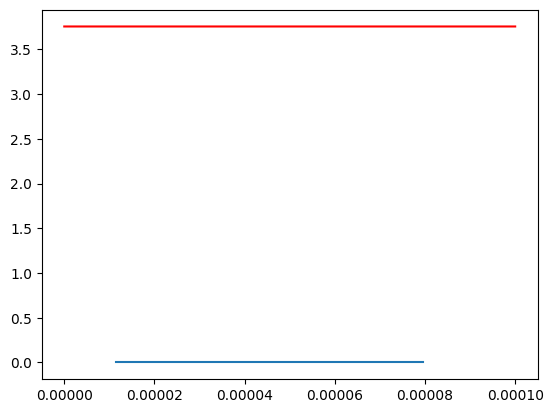

In [25]:
time_xcorr,phasse_xcorr = md.get_phase_xcorr(t,U, I, 440e3)
plt.plot(time_xcorr,phasse_xcorr)
plt.plot(t,phase_real_graph,"red")